### Librerias a utilizar

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [2]:
df3= pd.read_csv('movies_credits3.csv')

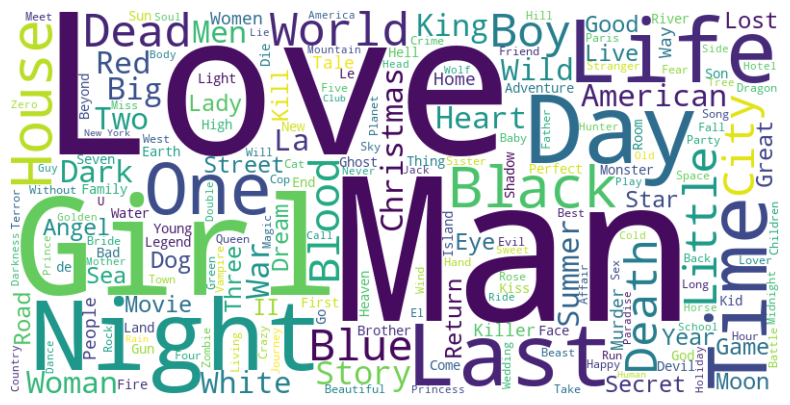

In [3]:
# Concateno todos los títulos en una sola cadena de texto
all_titles = ' '.join(df3['title'].dropna())

# Creo la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_titles)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



[nltk_data] Downloading package stopwords to C:\Users\Luis Fernando
[nltk_data]     Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Luis Fernando Martin\AppData\Local\Temp\ipykernel_7608\108735642.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=df_word_freq.head(20), palette='viridis')


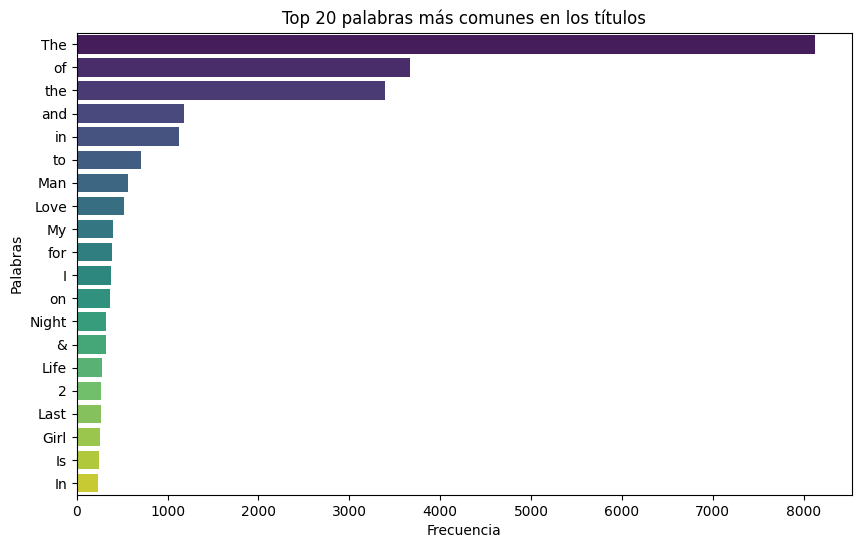

In [4]:

# Descargar stopwords si no lo has hecho previamente
nltk.download('stopwords')

# Definir las stopwords en español (o cambiar al idioma correspondiente)
stop_words = set(stopwords.words('spanish'))  # Asegúrate de acceder al corpus correcto

# Asegúrate de que 'all_titles' contenga todos los títulos concatenados como una sola cadena
all_titles = ' '.join(df3['title'].tolist())

# Divido todos los títulos en palabras individuales
words = all_titles.split()

# Filtro las stopwords
filtered_words = [word for word in words if word.lower() not in stop_words]

# Contamos la frecuencia de cada palabra
word_freq = Counter(filtered_words)

# Convierto el resultado en un DataFrame para visualizarlo
df_word_freq = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Visualizo las 20 palabras más comunes
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=df_word_freq.head(20), palette='viridis')
plt.title('Top 20 palabras más comunes en los títulos')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

C:\Users\Luis Fernando Martin\AppData\Local\Temp\ipykernel_7608\3946311713.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='genre', data=df_genre_freq.head(10), palette='magma')


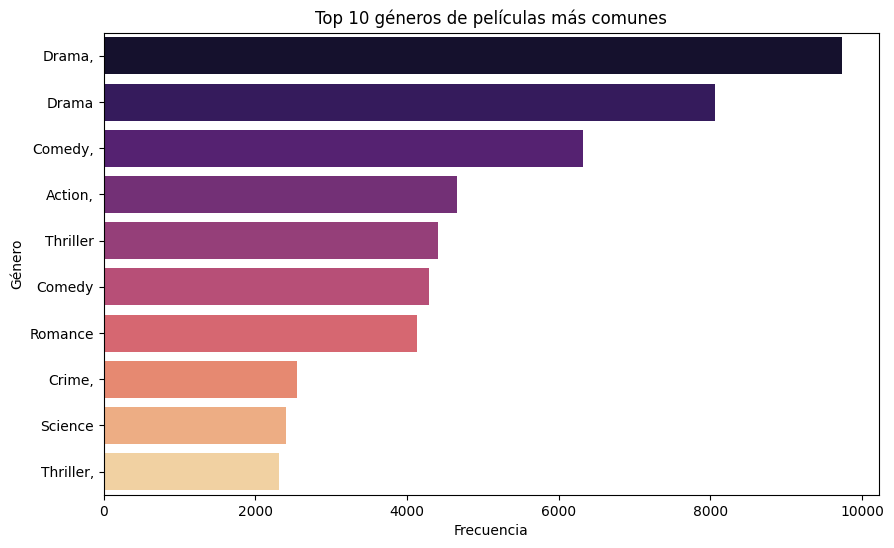

In [5]:

df3['genres'] = df3['genres'].fillna('')  # Llenamos los NaN con cadenas vacías

# Contamos la frecuencia de los géneros
all_genres = ' '.join(df3['genres']).replace('|', ' ').split()  # Separando por el separador utilizado en los géneros
genre_freq = Counter(all_genres)

# Convertimos en DataFrame
df_genre_freq = pd.DataFrame(genre_freq.items(), columns=['genre', 'frequency']).sort_values(by='frequency', ascending=False)

# Visualizamos la distribución de géneros
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='genre', data=df_genre_freq.head(10), palette='magma')
plt.title('Top 10 géneros de películas más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.show()


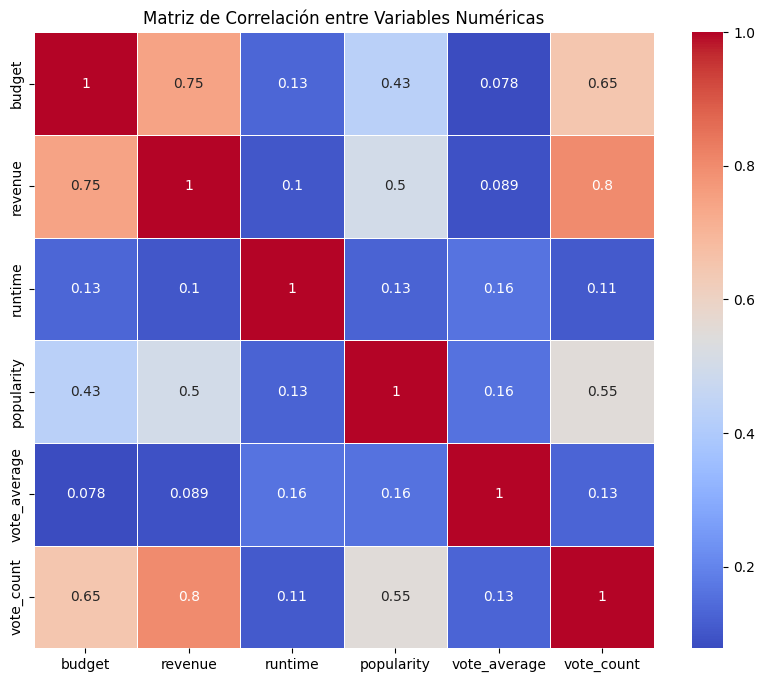

In [6]:

numeric_columns = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count'] 
# Creo una copia del DataFrame para no modificar el original
df_temp = df3.copy()

# Convierto 'sin dato' a NaN solo en la copia temporal
df_temp[numeric_columns] = df_temp[numeric_columns].replace('sin dato', np.nan)

# Convierto las columnas numéricas a tipo float en la copia temporal
df_temp[numeric_columns] = df_temp[numeric_columns].astype(float)

# Calculo la matriz de correlación en la copia temporal
correlation_matrix = df_temp[numeric_columns].corr()

# Visualizo la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

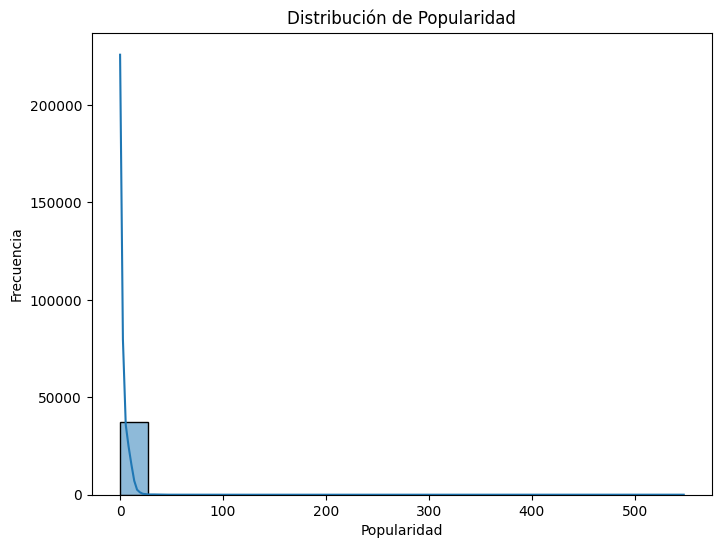

In [8]:
# Histograma de popularidad
plt.figure(figsize=(8, 6))
sns.histplot(df3['popularity'], bins=20, kde=True)
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Popularidad')
plt.show()

In [9]:
df3

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,coll_id,coll_name,production_company_id,production_company_name,release_year,return,director_name,actor_names
0,30000000.0,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,10194.0,Toy Story Collection,3.0,Pixar Animation Studios,1995.0,12.451801,John Lasseter,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
1,65000000.0,"Adventure, Fantasy, Family",8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,sin dato,sin dato,559.0,TriStar Pictures,1995.0,4.043035,Joe Johnston,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D..."
2,0.0,"Romance, Comedy",15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,119050.0,Grumpy Old Men Collection,6194.0,Warner Bros.,1995.0,0.000000,Howard Deutch,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret..."
3,16000000.0,"Comedy, Drama, Romance",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,sin dato,sin dato,306.0,Twentieth Century Fox Film Corporation,1995.0,5.090760,Forest Whitaker,"['Whitney Houston', 'Angela Bassett', 'Loretta..."
4,0.0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,96871.0,Father of the Bride Collection,5842.0,Sandollar Productions,1995.0,0.000000,Charles Shyer,"['Steve Martin', 'Diane Keaton', 'Martin Short..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37321,0.0,"Drama, Action, Romance",30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Robin Hood,5.7,26.0,sin dato,sin dato,7025.0,Westdeutscher Rundfunk (WDR),1991.0,0.000000,John Irvin,"['Patrick Bergin', 'Uma Thurman', 'David Morri..."
37322,0.0,Drama,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0,sin dato,sin dato,19653.0,Sine Olivia,2011.0,0.000000,Lav Diaz,"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio..."
37323,0.0,"Action, Drama, Thriller",67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Betrayal,3.8,6.0,sin dato,sin dato,6165.0,American World Pictures,2003.0,0.000000,Mark L. Lester,"['Erika Eleniak', 'Adam Baldwin', 'Julie du Pa..."
37324,0.0,sin dato,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Satan Triumphant,0.0,0.0,sin dato,sin dato,88753.0,Yermoliev,1917.0,0.000000,Yakov Protazanov,"['Iwan Mosschuchin', 'Nathalie Lissenko', 'Pav..."
